<h1> Data Visualization and Exploration

<h3>Problem Statement:</h3> 



<h3> Data Import and Attributes Finding</h3>

Loading the data, understanding the size, data types and attribute names.

In [1]:
#Import useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
#Loading and viewing the 
loan = pd.read_csv('loanprediction.csv')
loan.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Each row represents the data gathered from Taiwan Customer loan payment default: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [3]:
loan.info()
loan.isnull().sum().sum()
loan.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

<i>The data consists of 25 columns and shows no missing info for any of the 30,000 instances</i>

<b>Understanding the data dictionary</b>

<b>DEFAULT</b>: Default payment next month (1 = yes, 0 = no)

<b>LIMIT_BAL</b>: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

<b>GENDER</b>: Gender (1 = male; 2 = female).

<b>EDUCATION</b>: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

<b>MARRIAGE</b>: Marital status (1 = married; 2 = single; 3 = others).

<b>AGE</b>: Age (year).

<b>PAY_1 ~ PAY_6</b>: History of past payment.
We tracked the past monthly payment records (from April to September, 2005) as follows:
PAY_1 = the repayment status in September, 2005
PAY_2 = the repayment status in August, 2005;
. . .;
PAY_6 = the repayment status in April, 2005.

<b>The measurement scale for the repayment status is:</b>

-2 = no consumption;

-1 = pay duly;

1 = payment delay for one month;

2 = payment delay for two months;
. . .;

8 = payment delay for eight months;

9 = payment delay for nine months and above.

<b>BILL_AMT1 ~ BILL_AMT6</b>: Amount of bill statement (NT dollar).

BILL_AMT1 = amount of bill statement in September, 2005;

BILL_AMT2 = amount of bill statement in August, 2005;

. . .;

BILL_AMT6 = amount of bill statement in April, 2005.


<b>PAY_AMT1 ~ PAY_AMT6</b>: Amount of payment for previous month (NT dollar).

PAY_AMT1 = amount paid in September, 2005;

PAY_AMT2 = amount paid in August, 2005;
. . .;
PAY_AMT6 = amount paid in April, 2005.

<h3>Generating a Statistical Summary

In [4]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


<b>There are 30,000 loan clients<br>
<b>The average loan limit is 167484.322667<br>
<b>The max of Education 6, which is different from the assumption of the data dictionary<br>
<b>The max of Marriage is 3, which is also out of line with the data dictionary<br>

1. These attributes have different sclaes and may need to be normalized
2. Some histograms are tail heavy and extend to the right of the median
3. There are a number of categorical variables

<h3>Data Exploration

<b>Handling Discrepancies

<b> 1. Education
    From data dictionary: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

In [5]:
#Replacing values greater than 4 with 4
loan['EDUCATION'] = loan['EDUCATION'].apply(lambda edu_level: 4 if edu_level > 3 else edu_level)

#Checking there is no value above 4
loan['EDUCATION'].describe()

count    30000.000000
mean         1.840400
std          0.744097
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: EDUCATION, dtype: float64

<b> 2. Marriage
    From data dictionary:  Marital status (1 = married; 2 = single; 3 = others)

In [6]:
#Replacing values 0 and greater than 2 with 2,  i.e, others
loan['MARRIAGE'] = loan['MARRIAGE'].apply(lambda mar_level: 4 if mar_level == 0 or mar_level > 3 else mar_level)

#Checking there is no value above 2
loan['MARRIAGE'].describe()

count    30000.000000
mean         1.559067
std          0.528066
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: MARRIAGE, dtype: float64

<b> 3. Renaming "default payment next month" and PAY_0 to default_next and PAY_1 respectively

In [7]:
#Renaming
loan = loan.rename(columns={'default payment next month': 'default_next', 'PAY_0' : 'PAY_1'})

#Checking dataset for implementation
loan.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_next'],
      dtype='object')

<b> Visualizing the different attributes

In [8]:
#Dataset Categoricals: A list of Categorical columns
loan_categoricals = loan[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default_next']]


In [9]:
#frequency of default and non-default
loan['default_next'].value_counts()

# Converting values to percentage as percentages.

default_percent = round(loan['default_next'].value_counts(normalize=True).apply(lambda x: x * 100)[1], 2)
non_default_percent = round(loan['default_next'].value_counts(normalize=True).apply(lambda x: x * 100)[0], 2)

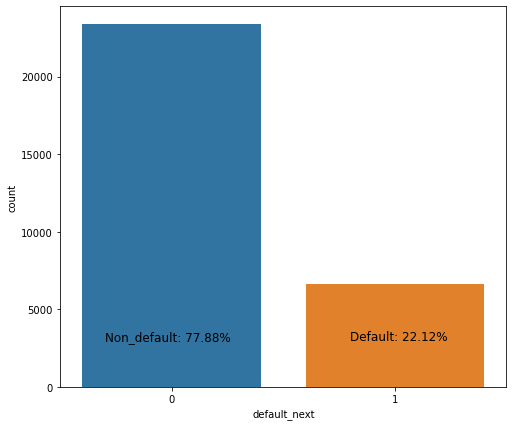

In [10]:
fig, ax = plt.subplots(figsize=(8,7))
sns.countplot(x ='default_next', data = loan)
plt.annotate('Non_default: {}%'.format(non_default_percent), xy=(-0.3, 3000), size=12)
plt.annotate('Default: {}%'.format(default_percent), xy=(0.8,3000), size=12)
plt.show()
    

<b><i> *This shows that the data is unbalanced, in terms of the output label category

NameError: name 'loan_categoricals_bias' is not defined

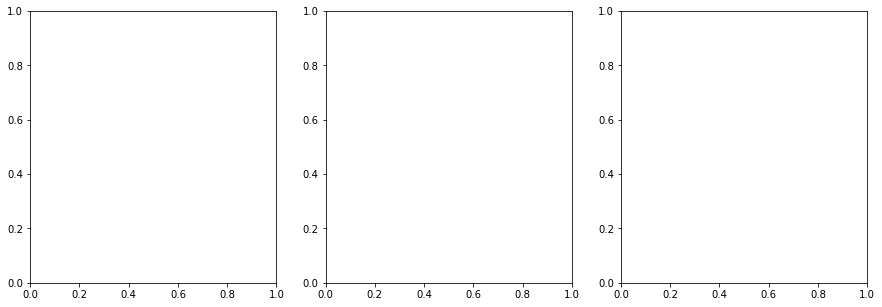

In [11]:
f, axis = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(x='SEX', hue='default_next', data=loan_categoricals_bias, palette='RdYlGn', ax=axis[0] )
sns.countplot(x='EDUCATION', hue='default_next', data=loan_categoricals_bias, palette='RdYlGn', ax=axis[1])
sns.countplot(x='MARRIAGE', hue='default_next', data=loan_categoricals_bias, palette='RdYlGn', ax=axis[2])


In [ ]:
loan['SEX'].value_counts()

In [ ]:
loan['EDUCATION'].value_counts()

In [ ]:
loan['MARRIAGE'].value_counts()

<i>From the countplots, it may be tempting to make certain inferences. However, the value counts show an uneven distribution among each group

In [ ]:
#Frequency Distribution of all data

loan.hist(bins=20, figsize=(15,15))
plt.show()

<h2>Feature Selection
<h4>Generating Correlation Matrix and Scatter Plot

In [ ]:
#Standard Correlation Coefficient
corr_matrix = loan.corr()
corr_matrix["default_next"].sort_values(ascending=False)

In [ ]:
#displaying only lower triangle of heatmap
# mask = np.zeros_like(corr_matrix, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

0plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cmap='RdYlGn', annot=True)
plt.show()

<i><b>From the correlation matrix, the payment histories seem to correlate best with the likelihood of payment. <br>The limit balance is the most negatively correlated feature

<b>Handling Categorical Variables

In [ ]:
loan_cat = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
#Converting Categoricals to object datatype
for i in loan_cat:
    loan[i] = loan[i].astype('object')
    
loan_categorical = loan.select_dtypes(include=['object'])


from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
loan_cat_encoded = cat_encoder.fit_transform(loan_categorical)

loan_cat_encoded.toarray()

<b>Splitting Data and Feature Scaling of Numerical Attributes

In [ ]:
loan_numericals = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4',
                   'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]



In [ ]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(loan[loan_numericals])

loan[loan_numericals] = scaler.transform(loan[loan_numericals].values)
loan.head()

In [ ]:
#Separating data in X and Y
X = loan.iloc[:,:-1].values
y = loan.iloc[:,-1].values

from sklearn.model_selection import train_test_split
#Splitting Data into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y.shape

<h3> Applying Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
naive_bayes = MultinomialNB(alpha=0.1) 
naive_bayes.fit(X_train, y_train)

In [ ]:
y_pred = naive_bayes.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
# roc = roc_auc_score(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

model_NB = pd.DataFrame([["Multinomial Naive Bayes", acc, prec, rec, f1, roc]], columns = ['Model', 'Accuracy', 'Precision',
                                                                                          'Recall', 'F1 Score', 'ROC'])
model_NB

<i>Using all scaled attributes at the same time, the accuracy is quite low